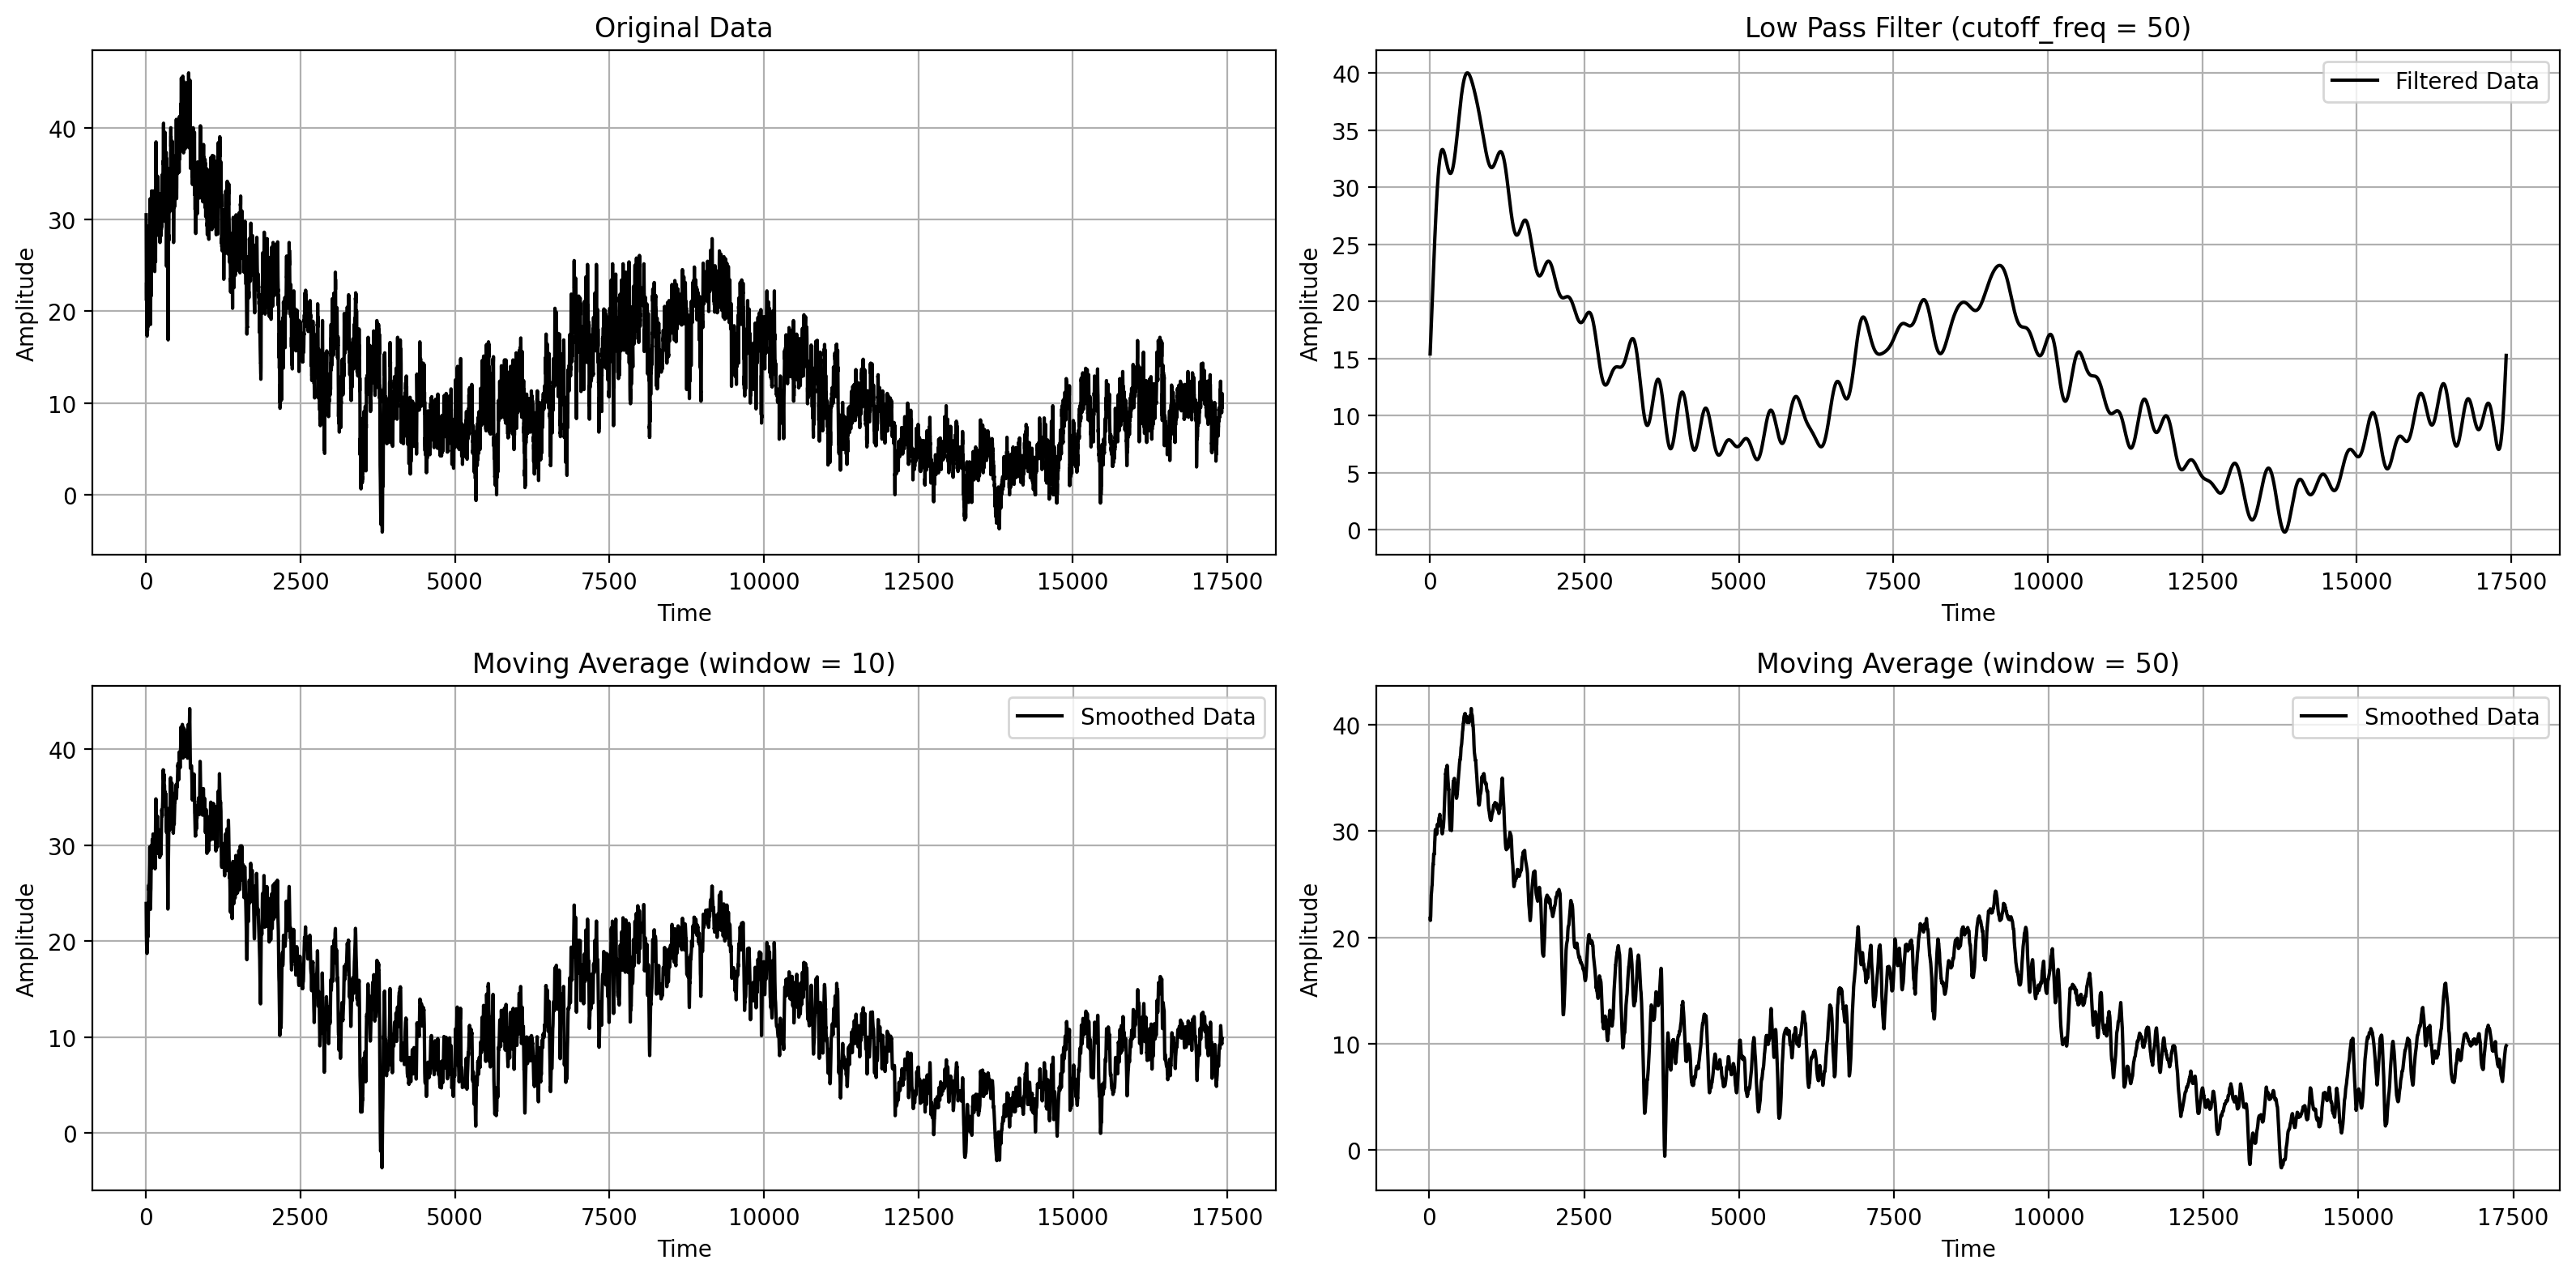

In [32]:
from matplotlib import pyplot as plt
from dataclasses import dataclass
from torch import optim
from torch import nn
import pandas as pd

%config InlineBackend.figure_format='retina'

y = pd.read_csv("../data/ETTh1.csv")
y = y.iloc[:, -1].to_numpy()
y_ = (y - y.mean()) / y.std()

import numpy as np
import matplotlib.pyplot as plt

def apply_low_pass_filter(signal, cutoff_frequency):
    x = signal.copy()
    x_mean, x_var = np.mean(x), np.var(x) + 1e-5
    x = (x - x_mean) / np.sqrt(x_var)
    specx = np.fft.rfft(x)
    specx[cutoff_frequency:] = 0
    filtered_x = np.fft.irfft(specx, n=len(x))
    return filtered_x * np.sqrt(x_var) + x_mean

def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size), 'valid') / window_size

data_subset = y # [:1000]

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# Original Data
axs[0, 0].plot(data_subset, color='black')
axs[0, 0].set_title('Original Data')
axs[0, 0].grid(True)

# Low Pass Filter
cutoff_freq = 50
low_pass = apply_low_pass_filter(data_subset, cutoff_freq)
axs[0, 1].plot(low_pass, color='black', label='Filtered Data')
axs[0, 1].set_title(f'Low Pass Filter (cutoff_freq = {cutoff_freq})')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Moving Average 10
kernel = 10
ma_10 = moving_average(data_subset, kernel)
axs[1, 0].plot(np.arange(len(ma_10)) + 5, ma_10, color='black', label='Smoothed Data')
axs[1, 0].set_title(f'Moving Average (window = {kernel})')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Moving Average 30
kernel = cutoff_freq
ma_30 = moving_average(data_subset, kernel)
axs[1, 1].plot(np.arange(len(ma_30)) + 15, ma_30, color='black', label='Smoothed Data')
axs[1, 1].set_title(f'Moving Average (window = {kernel})')
axs[1, 1].legend()
axs[1, 1].grid(True)

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Amplitude')

plt.tight_layout()
plt.show()